### Load libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

### Configuration

In [2]:
labels = open('./yolo_data/coco.names').read().strip().split('\n')
print(f"Number of classes: {len(labels)}")
print(labels)


Number of classes: 80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
weights_path = './yolo_data/yolov3.weights'
configuration_path = './yolo_data/yolov3.cfg'

### Load architecture

In [4]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)
layers_names_all = network.getLayerNames()
print(layers_names_all)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

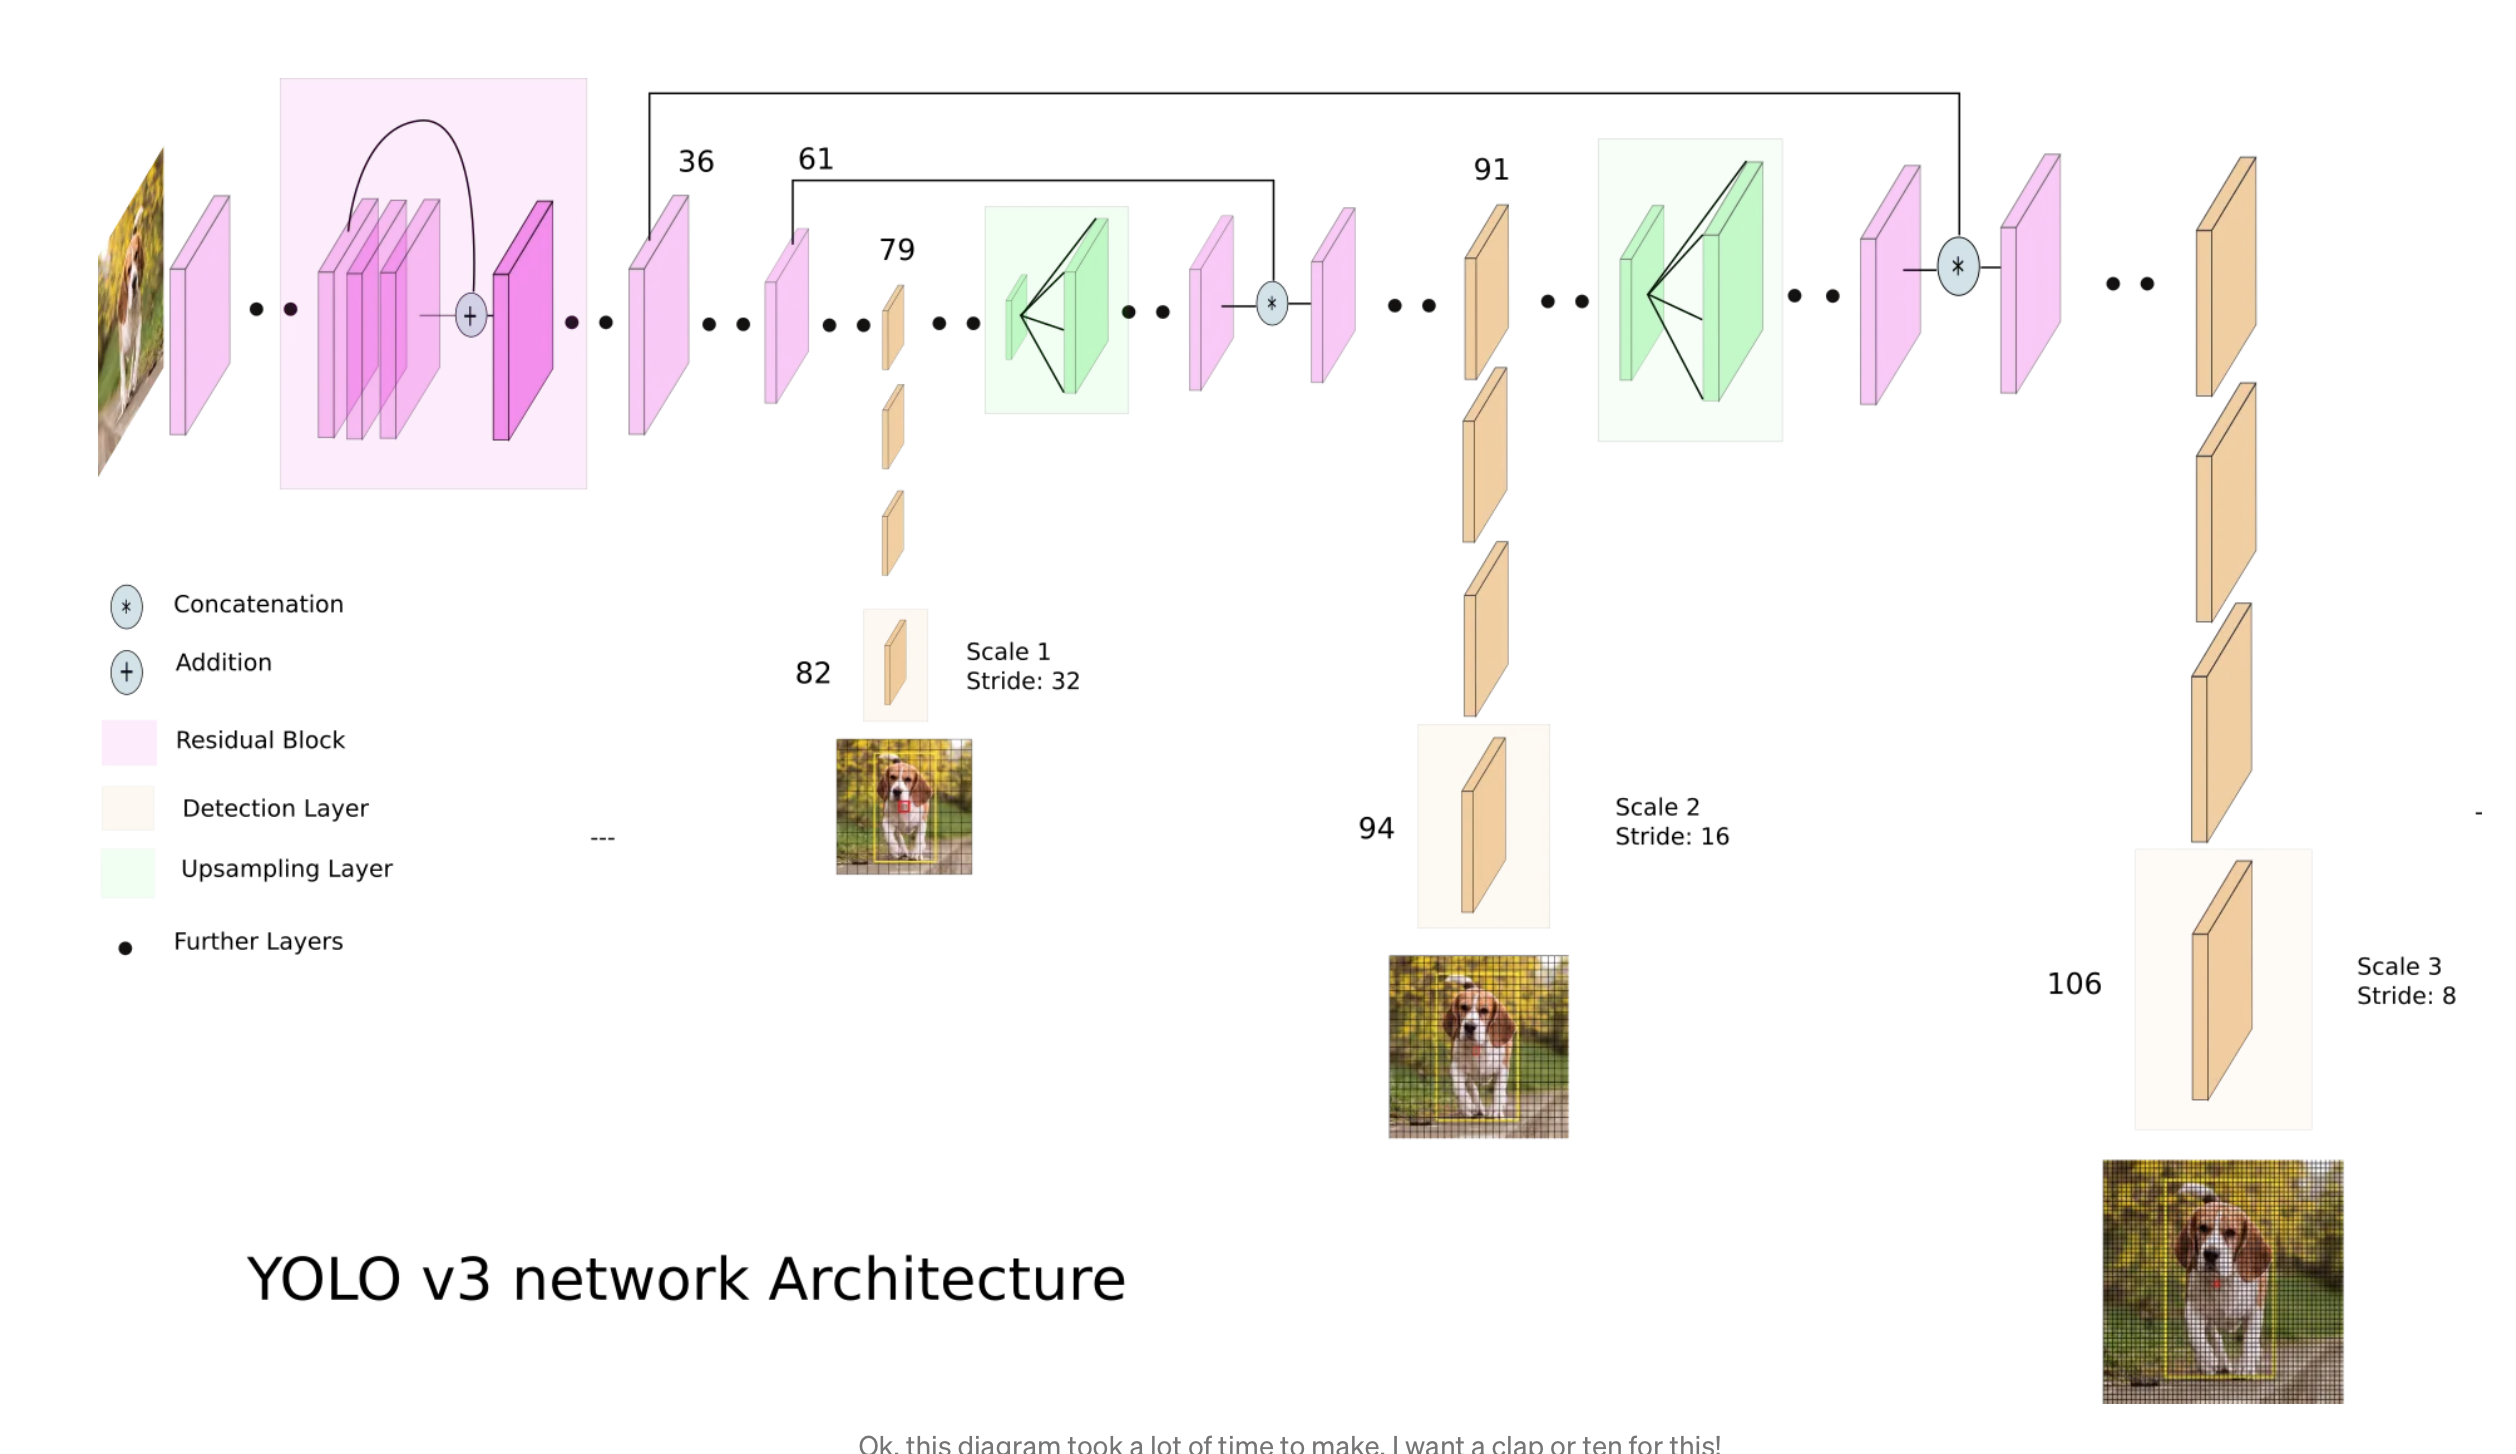

In [5]:
layers_names_output = [layers_names_all[i - 1] for i in network.getUnconnectedOutLayers()]
layers_names_output

['yolo_82', 'yolo_94', 'yolo_106']

---

### Load an image and check size

In [6]:
image_input = cv2.imread('./images/people_table.jpg')
image_input_shape = image_input.shape
print(image_input_shape) 

(2665, 3997, 3)


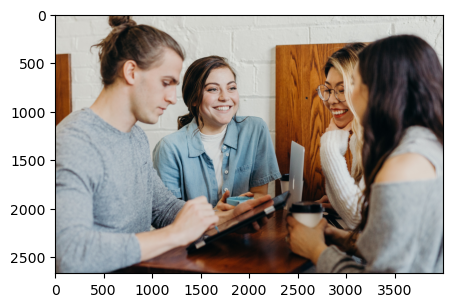

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

### Resize image (divisible by 32)

(416, 416, 3)


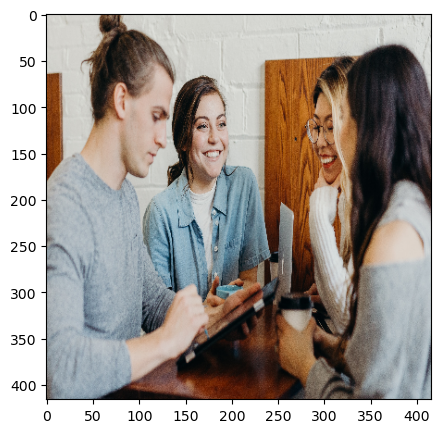

In [8]:
blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
print(blob_to_show.shape)  

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_to_show)
plt.show()

### Input the resized image to the output layers

In [9]:
network.setInput(blob)
output_from_network = network.forward(layers_names_output)


### Output per layer

In [10]:
[[b, len(a)] for a, b in zip(output_from_network, layers_names_output)]

[['yolo_82', 507], ['yolo_94', 2028], ['yolo_106', 8112]]

### Example of vector

In [11]:
output_from_network[0][0]

array([3.6994196e-02, 5.4072268e-02, 4.0612161e-01, 1.4713423e-01,
       3.3168082e-08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

---

### Number of significant results per YOLO layers

In [12]:
results = []

for x, yolo_layer in enumerate(output_from_network):
    
    count = 0
    
    for n, vector in enumerate(yolo_layer):
        
        if sum(vector[5:]) > 0:
            count += 1
            
    results.append([x, count])

print(results)

[[0, 17], [1, 4], [2, 4]]


### Calculate results

In [13]:
probability_minimum = 0.3

bounding_boxes = []
confidences = []
class_numbers = []
center = []

h, w = image_input_shape[:2]
print(h, w)

2665 3997


In [14]:
for result in output_from_network:
    
    for y_vector in result:
        
        # Get only the scores
        scores = y_vector[5:]
        
        # Find index of highest score
        class_current = np.argmax(scores)

        # Get the highest score
        confidence_current = scores[class_current]

        # Eliminate weak predictions
        if confidence_current >= probability_minimum:
            
            # Scaling bounding box coordinates to the initial image size
            box_current = y_vector[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            
            # Bottom left corner
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results 
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)
            
result_zip = list(zip(range(len(bounding_boxes)), bounding_boxes, confidences, class_numbers))

### Non Max Suppression

In [15]:
non_max_suppression_threshold = 0.3

In [16]:
results = []

for label_class in list(set(class_numbers)):
    
    # Get observations only for certain class
    observations = [obs for obs in result_zip if int(obs[-1]) == int(label_class)]
    
    # Get bounding only for certain class observations
    bounding_boxes_ = [i[1] for i in observations]
    
    # Get probabilities only for certain class observations
    confidences_ = [i[2] for i in observations]
    
    # Perform Non Max Suppression only for certain class observations
    result = cv2.dnn.NMSBoxes(bounding_boxes_, confidences_, probability_minimum, non_max_suppression_threshold)
    
    # Get global indexes of the chosen observations
    indexes = [observations[i][0] for i in list(result)]
    
    # Extend the results list
    results.extend(indexes)

# Switch results to np.array
results = np.array(results)




In [17]:
found_objects = [i for i in result_zip if i[0] in results]

for i in found_objects:
    print(f"{i[2]:.2f} - {labels[i[-1]]}")

0.98 - person
1.00 - person
0.99 - person
0.31 - person
0.74 - cell phone
0.33 - cup


In [18]:
## Leave all boxes
#results = np.array(list(range(len(bounding_boxes))))[:500]

---

### Set colors to labels

In [19]:
np.random.seed(43)
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

### Add predictions to copy of image

In [20]:
image_input2 = image_input.copy()

if len(results) > 0:
    
    for i in results.flatten():
        
        # Bounding box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image_input2, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 10)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])

        # Putting text with label and confidence on the original image
        cv2.putText(image_input2, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)
        

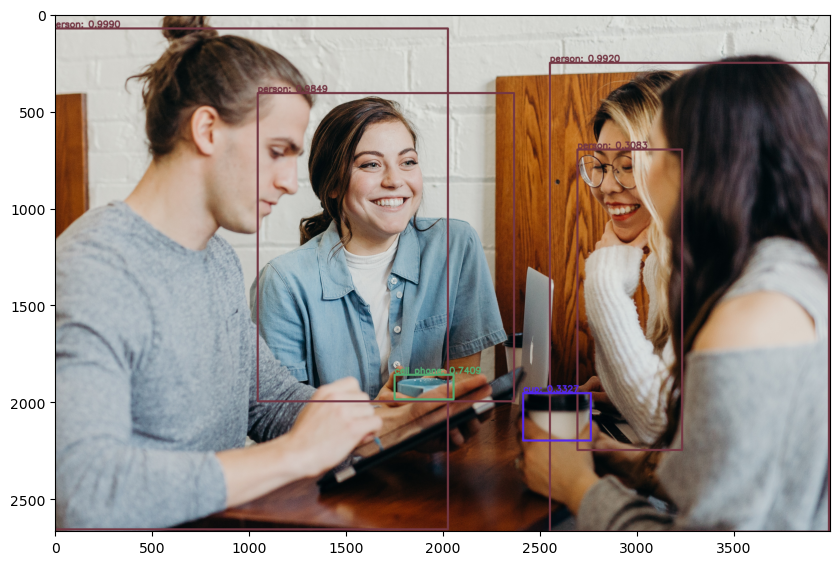

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input2, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
#People_table - 0.3x0.3
#People_table - 0.3x0.7/0.8
#People_table - 0.5x0.3
#Leave 500